In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
ls

cluster.csv            explore_process.ipynb


In [4]:
df = pd.read_csv('cluster.csv') 

In [5]:
df.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


In [6]:
len(df[df.duplicated()])

3

In [7]:
df.shape

(15589, 21)

Our dataset contains 15589 rows and 21 columns.

In [8]:
df.columns

Index(['Churn', 'Name', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'],
      dtype='object')

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [10]:
description = df.describe()

In [11]:
description.loc["completness"] = description.loc["count"]/15589
description

,Year_Birth,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
count,15394.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000
mean,1981.706444,5022.593816,2.841619,2.997242,2.844570,2.986016,3.245109,3.374816,3.506383,3.454231,3.459683,3.470845,3.700558,3.327282,3.692347,3.347360
std,15.179042,1027.962379,1.388624,1.518994,1.436948,1.299438,1.327026,1.352417,1.319565,1.310343,1.268130,1.293873,1.158644,1.266872,1.154437,1.300452
min,1936.000000,409.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1970.000000,4445.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,1981.000000,5088.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,1994.000000,5649.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,2014.000000,6950.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
completness,0.987491,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Identified fields problems:

* Missing 2.3% in year of birth

In [13]:
df.isna().sum()

Churn                  0
Name                   0
Longevity              0
Year_Birth           195
TypeTravel             0
RoomType               0
RewardPoints           0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
dtype: int64

In [10]:
df.skew()

/var/folders/ck/w8_yb2154cn9zxlb0hw0sgjnkbj1bs/T/ipykernel_6815/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Year_Birth          -0.003847
RewardPoints        -0.453779
Comfort             -0.100907
ReceptionSchedule   -0.260705
FoodDrink           -0.123610
Location            -0.050229
Wifi                -0.171255
Amenities           -0.599498
Staff               -0.554561
OnlineBooking       -0.472074
PriceQuality        -0.503381
RoomSpace           -0.482952
CheckOut            -0.750689
Checkin             -0.382588
Cleanliness         -0.745131
BarService          -0.358297
dtype: float64

Concerning the variables skewness, we can conclude the following:
- `Moderate skewness (between |0.5| and |1.0|)`: Dependents, Frq, Mnt, 
- `High skewness (higher than |1.0|)`: Rcn, Kitchen, HouseKeeping, Toys

In [11]:
df.describe(include = ['O'])

,Churn,Name,Longevity,TypeTravel,RoomType
count,15589,15589,15589,15589,15589
unique,2,14227,3,2,3
top,nochurn,Mr. Michael Smith,yes,business,single
freq,8477,9,12548,10756,7442


<a id='visual'></a>

### 2.3. Visual Exploration

#### 2.3.1.) Numerical Variables
__`Step 16`__ Check the distribution of the variable 'Mnt' using a `histplot()`. Define the color as green and the number of bins equal to 10.

https://seaborn.pydata.org/generated/seaborn.histplot.html

In [1]:
sns.histplot(df['CheckOut'], color="g", bins = 10)

NameError: name 'sns' is not defined

__`Step 17`__ Create a `scatterplot` where the x axis represent the Income and the y axis define the Mnt spent for each customer using seaborn.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [ ]:
sns.scatterplot(x = 'Income', y= 'Mnt', data = df)

We can clearly see that the higher the Income, the higher the monetary spent on our store.

<AxesSubplot:>

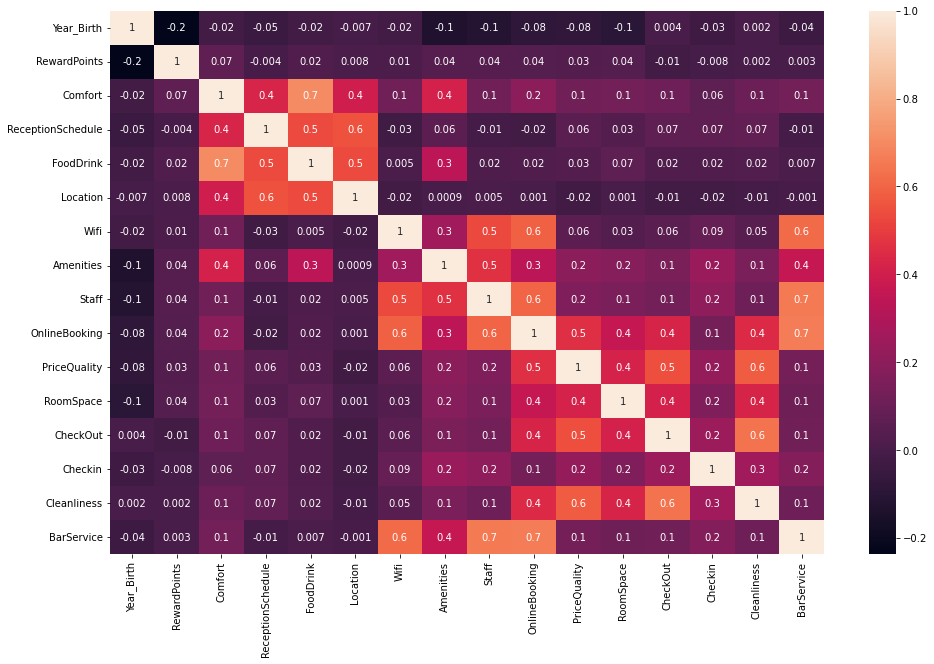

In [18]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

__`Step 17.B`__ This time, create a scatterplot similar to the previous one, but with the following changes:
- Define the size of the figure as (12,8)
- Create a scatterplot where the x axis will define the Income and the y axis will represent the Mnt. Use the parameter hue to represent a third variable, the recomendation.
- Define the lower limit of y as -200
- Define the lower limit of x as 0
- Define the ticks of the x axis between 0 and 160000, in steps of 30000
- Define the title of the plot as "Income vs Monetary vs Recomendation", with a fontsize of 16 and a blue color
- The legend of the plot should be on the upper left area and the title of the legend should be "Recomendation"
- Define the label of the x axis as "Customer's Income"
- Remove the top and right axis of the plot
- Save the figure as "my_plot.png", with a resolution of 300 dots per inch and with no background.

In [ ]:
figure = plt.figure(figsize=(12,8))
ax = plt.subplot(111) #  "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
sns.scatterplot(x = 'Income', y = 'Mnt', data = df, hue = 'Recomendation')


# define the limits of y axis using matplotlib.pyplot.ylim
plt.ylim(-200,None)
# define the limits of x axis using matplotlib.pyplot.xlim
plt.xlim(0,None)
# define the ticks in x axis using matplotlib.pyplot.xticks(start, stop, step)
# np.arange - Return evenly spaced values within a given interval.
plt.xticks(np.arange(0,160000,30000))
# define the title using matplotlib.pyplot.title
plt.title('Income vs Monetary vs Recomendation', fontsize= 16, color = 'blue')
# define the legend using matplotlib.pyplot.legend
plt.legend(loc = 'upper left', title = 'Recomendation')
# define the label for x axis using matplotlib.pyplot.xlabel
plt.xlabel("Customer's Income")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('my_plot.png', dpi = 300, transparent = True)

__`Step 18`__ Plot the pairwise relationships of the variables "Clothes", "Toys" and "HouseKeeping" using a `pairplot`

https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [19]:
def even(n):
    if n%2==0:
        return 1
    return 0

def divide(x,y):
    return even(x/y)

In [22]:
import random
import math
import numpy as np

randnum = np.random.randint(0,1,10000)
randden = np.random.randint(0,1,10000)



list(map(divide, ))

array([0, 0, 0, ..., 0, 0, 0])

__`Step 19`__ Check the spearman correlation between numerical variables using the method `corr(method = 'spearman')`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html <br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html

We can verify that NetPurchase and StorePurchase have a perfect negative correlation. We don't need both variables. We are going to remove one of them in __`Step `__ 

#### 2.3.2.) Categorical Variables

__`Step 20`__ Show the counts of observations in each categorical bin using bars for the variable "Marital_Status" using a `countplot()`.
Define the hue as "Gender". Show only the counting for Single, Divorced, Widow, Married and Together in this order.

https://seaborn.pydata.org/generated/seaborn.countplot.html

In [ ]:
sns.countplot(y = 'Marital_Status', hue = 'Gender', data = df,
             order = ['Single','Divorced','Widow','Married','Together'])

__`Step 21`__ Draw a scatterplot between Income (numerical variable) and Education (categorical variable) using the `stripplot()`

In [ ]:
sns.stripplot(x = 'Income', y = 'Education', data = df)

We cannot see any big differences on the money earned depending on the Education level.

<a id='depth'></a>

### 2.4. In-depth Exploration

We can go further and try to understand better our population of study using the methods `groupby()` and `query()`

__`Step 22`__ What is the mean value of `Mnt` when `Dependents` is equal to 0? And when is equal to 1? Use `groupby()`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html

In [ ]:
df.groupby('Dependents')['Mnt'].mean()

__`Step 23`__ What is the median value of `Mnt` spent by female customers when `Dependents` is equal to 0? And when is equal to 1? Use `groupby()` and `query()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html

In [ ]:
df.query('Gender == "F"').groupby('Dependents')['Mnt'].median()

[BACK TO TOC](#toc)

<a id='preprocess'></a>

# <font color = '#cc9900'> 3. Preprocess Data </font>

<img src="images/phase04.png" alt="Drawing" style="width: 500px;"/>

<a id='clean'></a>

## 3.1. Data Cleaning

<a id='outliers'></a>

### 3.1.1. Outliers

In __Step 13__ we understood that the variables "Rcn" and "Kitchen", due to the high kurtosis, could have potential outliers. In the following steps we are going to investigate further this possible situation.

__`Step 24`__ Create a figure with two axes, where the boxplots of the variables "Rcn" and "Kitchen" are shown. Use the `boxplot()` from seaborn. 

https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = axes[0], data = df, x = 'Rcn')
sns.boxplot(ax = axes[1], data = df, x = 'Kitchen')

__`Step 25`__ Create a figure with two axes, where the histplots of the variables "Rcn" and "Kitchen" are shown. Use the `histplot()` from seaborn. 

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = df, x = 'Rcn')
sns.histplot(ax = axes[1], data = df, x = 'Kitchen', bins = 20)

__`Step 26`__ Remove the observations where Kitchen is higher than 50 using the method `drop()`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [ ]:
df_no_outliers = df.drop(df[df['Kitchen'] > 50].index)
df_no_outliers

<a id='missing'></a>

### 3.1.2. Missing Values

__`Step 27`__ Check how many missing values you have in the dataset using `isna().sum()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html

In [ ]:
df.isna().sum()

__`Step 28`__ Fill with the method `fillna()` those missing values. For the categorical variables, use the most frequent value and for the numerical ones use the median.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [ ]:
df.fillna({
    'Education': df['Education'].value_counts().idxmax(),
    'Marital_Status': df['Marital_Status'].value_counts().idxmax(),
    'Income':df['Income'].median()
    }, inplace = True)
df.isna().sum()/len(df)

We still have a variable ("Credit_Card") with 97% of values missing. We are going to remove this variable in a further step.

[BACK TO TOC](#toc)

<a id='transform'></a>

## 3.2. Data Transformation

<a id='new'></a>

### 3.2.1. Create new variables

__`Step 29`__ Create the variable "Age" from the "Year_Birth".

In [ ]:
from datetime import date
df['Age'] = date.today().year - df['Year_Birth']
df

__`Step 30`__ Create a new variable where the purpose is to understand how much money a customer spend on my store each time.

In [ ]:
df['MntFrq'] = df['Mnt']/df['Frq']
df

<a id='misc'></a>

### 3.2.2. Misclassifications

__`Step 31`__ Review the counting for possible values in the Gender variable using `value_counts()`

In [ ]:
df['Gender'].value_counts()

__`Step 31.B`__ Replace the "?" with the most frequent value using `value_counts().idxmax()`, which is going to return the most frequent value.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

In [ ]:
df['Gender'] = df['Gender'].replace('?',df['Gender'].value_counts().idxmax())
df['Gender'].value_counts()

__`Step 32`__ Review the counting for possible values in the Marital_Status variable with `value_counts()`

In [ ]:
df['Marital_Status'].value_counts()

__`Step 32.B`__ Change "TOGETHER" to "Together" and do the same (Capitalize the words) for "DIVORCED" and "MARRIED" using `str.capitalize()`

In [ ]:
df['Marital_Status'] = df['Marital_Status'].str.capitalize() 
df['Marital_Status'].value_counts()

__`Step 32.C`__ Replace the "BigConfusion" with the most frequent value.

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace('Bigconfusion',df['Marital_Status'].value_counts().idxmax())
df['Marital_Status'].value_counts()

__`Step 33`__ Review the counting for possible values in the Education variable.

In [ ]:
df['Education'].value_counts()

__`Step 33.B`__ Replace the "OldSchool" with the most frequent value with `value_counts().idxmax()`.

In [ ]:
df['Education'] = df['Education'].replace('OldSchool',df['Education'].value_counts().idxmax())
df['Education'].value_counts()

<a id='inco'></a>

### 3.2.3. Incoherencies

__`Step 34`__ Check possible incoherencies in your data. One situation that is impossible to happen is to have values of frequency equal to 0 when there was some money spent by the customer. Change those values of Frequency to 1.

In [ ]:
if((df['Mnt']>0).any() & (df['Frq']==0).any()):
    df.loc[data['Mnt']>0, 'Frq']=1

<a id='bin'></a>

### 3.2.4. Binning

__`Step 35`__ Create a new variable named as "Income_bins" where Income is going to be represented in thre possible values - "Low", "Medium" and "High". By using the method `cut()`, those are going to be equal-width bins.

https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [ ]:
df['Income_bins'] = pd.cut(df['Income'], 3, labels=["low", "medium", "high"])
df

<a id='rec'></a>

### 3.2.5. Reclassify

__`Step 36`__ Due to the similarity of the classification, change the value "Together" to "Married" in Marital_Status using the method `replace()`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')
df['Marital_Status'].value_counts()

__`Step 37`__ Since we are not sure about what 2nd Cycle and Basic School means, we are going to create a new binary variable where if the customer has higher education we assign the value 1, and 0 otherwise.
Remove the variable "education".

In [ ]:
df['Higher_Educ'] = np.where((df['Education']=='Graduation')|
                               (df['Education']=='Master')|
                               (df['Education']=='PhD'),1,0)
df.drop('Education', axis = 1, inplace = True)
df

<a id='power'></a>

### 3.2.6. Power Transform

__`Step 38`__ Create a new variable "sqrt_rcn" by applying a square root transformation to the variable "Rcn", in order to try to normalize the variable.

In [ ]:
df['sqrt_rcn'] = np.sqrt(df['Rcn'])

__`Step 38.B`__ Compare the distribution of the variables 'Rcn' and 'sqrt_rcn' with a histplot.

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = df, x = 'Rcn', bins = 10)
sns.histplot(ax = axes[1], data = df, x = 'sqrt_rcn', bins = 10)

Before applying scaling in our final dataset, we are going to remove some features that could lead to problems on modelling or even on the scaling.

[BACK TO TOC](#toc)

<a id='reduce'></a>

## 3.3. Data Reduction 

<a id='corr'></a>

### 3.3.1. Multicollinearity - Check correlation

We understood in __Step 19__, using the heatmap to check the spearman correlation between the variables, that NetPurchase had a perfect negative relationship with StorePurchase. We don't need both, so we are going to remove one of those.

__`Step 39`__ Drop the variable "NetPurchase", since it is highly correlated with "StorePurchase". Do the same with Date_Birth, since we used this variable to calculate "Age" and they are highly correlated using `drop()`

In [ ]:
print("Initial number of variables:", df.shape)
df.drop('NetPurchase', axis = 1, inplace = True)
df.drop('Year_Birth', axis = 1, inplace = True)
df.shape

<a id='unary'></a>

### 3.3.2. Unary Variables

__`Step 40`__ Drop the variable "Country", since it is an unary variable with `drop()`

In [ ]:
df.drop('Country', axis = 1, inplace = True)

<a id='na'></a>

### 3.3.3. Variables with a high percentage of missing values

__`Step 41`__ Drop the variable "Credit_Card", since it has 97% of the values missing using `dropna()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [ ]:
#data.drop('Credit_Card', axis = 1, inplace = True)
df.dropna(axis = 1, thresh = len(df)/100*90)

## 3.2. Back to Data Transformation

<a id='dummy'></a>

### 3.2.7. Creating Dummy variables

__`Step 42`__ For the variable "Income_bins" where we have an order, we are going to apply ordinal encoding. Define the low value to 0, medium to 1 and high to 2 using the method `replace()`.

In [ ]:
df['Income_bins'] = df['Income_bins'].replace('low',0).replace('medium',1).replace('high',2)
df.info()

__`Step 42.B`__ We can see from the `info()` of the dataset that "Income_bins" is now a category. Convert this variable into an integer using `astype()` and check the new data type with the attribute `dtype`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

In [ ]:
df['Income_bins'] = df['Income_bins'].astype('int')
df['Income_bins'].dtype

__`Step 43`__ For the categorical variables, apply `get_dummies()`.

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [ ]:
df_dummies = pd.get_dummies(df, drop_first = True)
df_dummies

<a id='scale'></a>

### 3.2.8. Scaling

__`Step 44`__ Scale the data using `MinMaxScaler()` in the range [0,1].

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
scaled_df = MinMaxScaler().fit_transform(df_dummies)
scaled_df

This will return an array and not a dataframe. <br><br>
__`Step 45`__ We need to convert the array scaled_data to a Pandas DataFrame, by using `pd.DataFrame()`. Furthermore, we are going to assign the header of the columns equal to our dataframe not scaled yet (df_dummies).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [ ]:
cols = df_dummies.columns
scaled_df = pd.DataFrame(scaled_df, columns = cols)
scaled_df

## 3.3. Back to Data Reduction

If you end up with a significant number of variables, you can try to apply PCA in order to try to reduce the dimensionality of the dataset.

<a id='pca'></a>

### 3.3.4. Apply PCA
Sklearn Library: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">Documentation</a>

[BACK TO TOC](#toc)